In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Hyderabad.csv')

In [3]:
data.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'outlier points at area > 6000 & price at  16Cr')

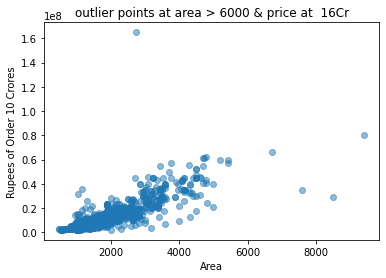

In [4]:
plt.scatter(x=data['Area'],y=data['Price'],alpha=0.5)
plt.ylabel('Rupees of Order 10 Crores')
plt.xlabel('Area')
plt.title('outlier points at area > 6000 & price at  16Cr')

<AxesSubplot:xlabel='Price'>

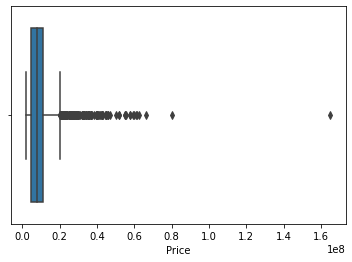

In [5]:
sb.boxplot(x=data['Price'])

Text(0.5, 1.0, 'Most of House areas in dataset are under 2000')

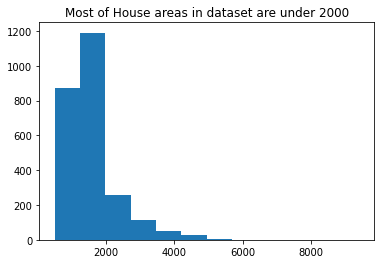

In [6]:
plt.hist(data['Area'],bins=12)
plt.title('Most of House areas in dataset are under 2000')

In [7]:
len(data['Location'].unique()) 
#There are 243 Unique Locations 

243

In [8]:
data.groupby('Location')['Price'].count().sort_values(ascending=False)[0:10]
#Top 30 Locations of houses from the dataset

Location
Kukatpally                   166
Kondapur                     149
Manikonda                    115
Nizampet                     106
Gachibowli                    83
Hitech City                   82
Miyapur                       80
Kokapet                       79
Pragathi Nagar Kukatpally     57
Bachupally Road               55
Name: Price, dtype: int64

In [9]:
#Location_text

<h2>Data Cleaning</h2>
Outliers and the null values are removed

In [10]:
#from sklearn.impute import SimpleImputer
#imp=SimpleImputer(missing_values=9,strategy=median)

In [11]:
# Replacing 9 with Null values
data[5:]=data[5:].replace(to_replace=9,value=np.nan)
data.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Resale                  0
MaintenanceStaff       84
Gymnasium              84
SwimmingPool           84
LandscapedGardens      84
JoggingTrack           84
RainWaterHarvesting    84
IndoorGames            84
ShoppingMall           84
Intercom               84
SportsFacility         84
ATM                    84
ClubHouse              84
School                 84
24X7Security           84
PowerBackup            84
CarParking             84
StaffQuarter           84
Cafeteria              84
MultipurposeRoom       84
Hospital               84
WashingMachine         84
Gasconnection          84
AC                     84
Wifi                   84
Children'splayarea     84
LiftAvailable          84
BED                    84
VaastuCompliant        84
Microwave              84
GolfCourse             84
TV                     84
DiningTable            84
Sofa                   84
Wardrobe    

In [12]:
len(data) #Before removing null values

2518

In [13]:
data=data[5:].dropna(axis=0)
len(data)
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [14]:
len(data) #After removing null values

2429

In [15]:
#To impute data rather than removing nulls
"""
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=9,strategy='most_frequent')
cols=data.columns[5:]
data[cols]=imp.fit_transform(data[cols])
"""

"\nfrom sklearn.impute import SimpleImputer\nimp=SimpleImputer(missing_values=9,strategy='most_frequent')\ncols=data.columns[5:]\ndata[cols]=imp.fit_transform(data[cols])\n"

In [16]:
data.describe() #the data is clean

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.429000e+03,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,...,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,9.842969e+06,1643.997118,2.626184,0.221490,0.116509,0.454508,0.423631,0.329354,0.268423,0.316591,...,0.698641,0.062166,0.317415,0.044051,0.030877,0.021820,0.035406,0.043639,0.042404,0.025525
std,8.852292e+06,747.802163,0.684788,0.415335,0.320900,0.498029,0.494235,0.470075,0.443230,0.465242,...,0.458943,0.241506,0.465566,0.205251,0.173020,0.146125,0.184841,0.204333,0.201551,0.157745
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1165.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1820.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#data.to_csv('Hyderabad-vcr.csv')

Imputing Outliers

In [18]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
irp=q3-q1
low=q1-1.5*irp
upr=q3+1.5*irp
#low=data['Price'].min() #since low was neg
low,upr

(-4450000.0, 20110000.0)

In [19]:
def imp(val):
    if val>upr:
        return upr
    if val<low:
        return low
    else:
        return val
data['Price']=data['Price'].apply(imp)

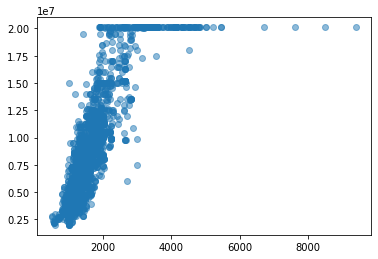

In [20]:
plt.scatter(x=data['Area'],y=data['Price'],alpha=0.5)

<AxesSubplot:xlabel='Price'>

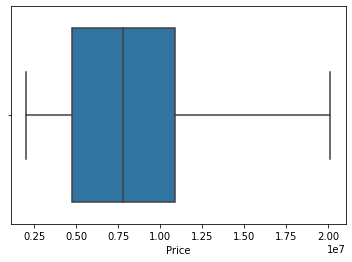

In [21]:
sb.boxplot(x=data['Price'])

## Location variable is being transformed


In [22]:
#For location it has many unique values and has alternate hypothesis so we need to bin the values to fewer groups
#For that we are going to find the mean Price for each location and sorting them in ascending order
Location_table=data.groupby('Location').agg({'Price':'mean'}).sort_values('Price',ascending=True)

In [23]:
Location_table.head()

,Price
Location,
Jhangir Pet,2014000.0
Old Nallakunta,2300000.0
Miyapur HMT Swarnapuri Colony,2500000.0
Hakimpet,2700000.0
KTR Colony,2700000.0


In [24]:
Location_table['Loc']=pd.cut(Location_table['Price'],bins=10,labels=['G0',
                                                          'G1',
                                                          'G2',
                                                          'G3',
                                                          'G4',
                                                          'G5',
                                                          'G6',
                                                          'G7',
                                                          'G8',
                                                          'G9'],
                           include_lowest=True)

In [25]:
Location_table['Loc'].head()

Location
Jhangir Pet                      G0
Old Nallakunta                   G0
Miyapur HMT Swarnapuri Colony    G0
Hakimpet                         G0
KTR Colony                       G0
Name: Loc, dtype: category
Categories (10, object): ['G0' < 'G1' < 'G2' < 'G3' ... 'G6' < 'G7' < 'G8' < 'G9']

In [26]:
Location_table

,Price,Loc
Location,,
Jhangir Pet,2014000.0,G0
Old Nallakunta,2300000.0,G0
Miyapur HMT Swarnapuri Colony,2500000.0,G0
Hakimpet,2700000.0,G0
KTR Colony,2700000.0,G0
...,...,...
Kavuri Hills,20110000.0,G9
Basheer Bagh,20110000.0,G9
Film Nagar,20110000.0,G9


In [27]:
Location_table=Location_table.drop(columns="Price")
#TO merge two tables we use "merge" function from pandas using zipcode as identifier
data=pd.merge(data,Location_table,
                left_on='Location',
                how='left',
                right_index=True)
data.drop(columns='Location',inplace=True)

In [28]:
data.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Loc
5,6099000.0,1230,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G1
6,7000000.0,1350,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G3
7,4198000.0,1400,3,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G6
8,9900000.0,2240,3,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G4
9,9800000.0,1520,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G6


In [29]:
#now create dummies for Location
data=pd.get_dummies(data,columns=['Loc'],drop_first=True)
data.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Refrigerator,Loc_G1,Loc_G2,Loc_G3,Loc_G4,Loc_G5,Loc_G6,Loc_G7,Loc_G8,Loc_G9
5,6099000.0,1230,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0,0
6,7000000.0,1350,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0
7,4198000.0,1400,3,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
8,9900000.0,2240,3,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,0
9,9800000.0,1520,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0


In [30]:
#data.to_csv('Hyderabad-vtcr.csv')

## Implementing Linear Regression

In [31]:
from sklearn.preprocessing import StandardScaler as ss
#Scaling the data set
scalar=ss()
Y=data['Price']
# Scaling
X=scalar.fit_transform(data.drop(columns=['Price']))




# Converting to pandas dataframe for easy manipulation
X=pd.DataFrame(data=X,columns=data.drop(columns=['Price']).columns)
X.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Refrigerator,Loc_G1,Loc_G2,Loc_G3,Loc_G4,Loc_G5,Loc_G6,Loc_G7,Loc_G8,Loc_G9
0,-0.553733,-0.914607,-0.533391,-0.363144,-0.912802,-0.857321,-0.700784,-0.605731,-0.680627,-0.638201,...,-0.161844,1.930202,-0.431318,-0.439347,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
1,-0.393229,-0.914607,-0.533391,-0.363144,-0.912802,-0.857321,-0.700784,-0.605731,-0.680627,-0.638201,...,-0.161844,-0.518080,-0.431318,2.276107,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
2,-0.326353,0.545998,-0.533391,-0.363144,1.095528,1.166424,-0.700784,-0.605731,-0.680627,-0.638201,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,-0.358772,3.925833,-0.192737,-0.188094,-0.155017
3,0.797170,0.545998,-0.533391,-0.363144,1.095528,1.166424,-0.700784,-0.605731,-0.680627,1.566905,...,-0.161844,-0.518080,-0.431318,-0.439347,2.457759,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
4,-0.165850,-0.914607,1.874799,-0.363144,-0.912802,-0.857321,-0.700784,-0.605731,-0.680627,-0.638201,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,-0.358772,3.925833,-0.192737,-0.188094,-0.155017


# Multicollinearity check

In [32]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5)) & (i!=j)]
z,len(z)

([['Area', 'No. of Bedrooms'],
  ['No. of Bedrooms', 'Area'],
  ['Gymnasium', 'SwimmingPool'],
  ['Gymnasium', 'LandscapedGardens'],
  ['Gymnasium', 'JoggingTrack'],
  ['Gymnasium', 'RainWaterHarvesting'],
  ['Gymnasium', 'IndoorGames'],
  ['Gymnasium', 'Intercom'],
  ['Gymnasium', 'SportsFacility'],
  ['Gymnasium', 'ClubHouse'],
  ['Gymnasium', '24X7Security'],
  ['Gymnasium', 'PowerBackup'],
  ['Gymnasium', 'MultipurposeRoom'],
  ['Gymnasium', "Children'splayarea"],
  ['Gymnasium', 'LiftAvailable'],
  ['Gymnasium', 'VaastuCompliant'],
  ['SwimmingPool', 'Gymnasium'],
  ['SwimmingPool', 'LandscapedGardens'],
  ['SwimmingPool', 'JoggingTrack'],
  ['SwimmingPool', 'RainWaterHarvesting'],
  ['SwimmingPool', 'IndoorGames'],
  ['SwimmingPool', 'Intercom'],
  ['SwimmingPool', 'SportsFacility'],
  ['SwimmingPool', 'ClubHouse'],
  ['SwimmingPool', '24X7Security'],
  ['SwimmingPool', 'PowerBackup'],
  ['SwimmingPool', 'CarParking'],
  ['SwimmingPool', 'MultipurposeRoom'],
  ['SwimmingPool', "C

In [33]:
#Caluclating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIF=pd.Series([vif(X.values,i) for i in range (X.shape[1])],index=X.columns)
VIF

Area                   3.619908
No. of Bedrooms        3.000448
Resale                 1.318944
MaintenanceStaff       1.647690
Gymnasium              7.205608
SwimmingPool           6.518036
LandscapedGardens      4.289014
JoggingTrack           4.403984
RainWaterHarvesting    3.683114
IndoorGames            4.080664
ShoppingMall           2.627049
Intercom               2.679220
SportsFacility         2.930569
ATM                    2.651714
ClubHouse              6.114565
School                 4.369186
24X7Security           5.050417
PowerBackup            3.041550
CarParking             4.140217
StaffQuarter           1.860861
Cafeteria              2.161985
MultipurposeRoom       2.835957
Hospital               4.518467
WashingMachine         3.430816
Gasconnection          1.767896
AC                     2.217924
Wifi                   1.432058
Children'splayarea     4.651672
LiftAvailable          2.748647
BED                    1.905044
VaastuCompliant        3.166460
Microwav

In [34]:
# We need to remove vif > 5 and each time we remove one column the vif data changes so we remove,check vif,remove
def MC_rem(data):
    VIF=pd.Series([vif(data.values,i) for i in range (data.shape[1])],index=data.columns)
    if(VIF.max()>5):
        data.drop(columns=[VIF[VIF==VIF.max()].index[0]],inplace=True)
        print(VIF[VIF==VIF.max()].index[0],'has been removed from "X_copy"')
        return data
    else:
        print('no multicollinearity')
        return data

In [35]:
X_copy=X.copy()
for i in range(5):
    X_copy=MC_rem(X_copy)
X=X_copy
###After Removing collinearity
VIF=pd.Series([vif(X_copy.values,i) for i in range (X_copy.shape[1])],index=X_copy.columns)
VIF

Gymnasium has been removed from "X_copy"
ClubHouse has been removed from "X_copy"
24X7Security has been removed from "X_copy"
no multicollinearity
no multicollinearity


Area                   3.608149
No. of Bedrooms        2.993354
Resale                 1.311949
MaintenanceStaff       1.629341
SwimmingPool           4.656135
LandscapedGardens      4.211734
JoggingTrack           4.278377
RainWaterHarvesting    3.392863
IndoorGames            3.979458
ShoppingMall           2.602963
Intercom               2.551353
SportsFacility         2.663452
ATM                    2.646685
School                 4.365499
PowerBackup            2.873469
CarParking             2.984724
StaffQuarter           1.856704
Cafeteria              2.140798
MultipurposeRoom       2.792267
Hospital               4.492089
WashingMachine         3.419810
Gasconnection          1.725644
AC                     2.207930
Wifi                   1.430391
Children'splayarea     3.860346
LiftAvailable          2.701989
BED                    1.892530
VaastuCompliant        3.134873
Microwave              2.275675
GolfCourse             1.762972
TV                     2.583428
DiningTa

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1700, 44), (729, 44), (1700,), (729,))

In [42]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression(normalize=True)
# If norm=true intercept=0
lr.fit(X_train,Y_train)

C:\Users\Aorus\anaconda3\envs\Gpu_work\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [43]:
predictions=lr.predict(X_test)
lr.score(X_test,Y_test)

0.8292427631328946

In [44]:
X_test

,Area,No. of Bedrooms,Resale,MaintenanceStaff,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,...,Refrigerator,Loc_G1,Loc_G2,Loc_G3,Loc_G4,Loc_G5,Loc_G6,Loc_G7,Loc_G8,Loc_G9
2126,-0.593858,-0.914607,1.874799,-0.363144,-0.857321,-0.700784,-0.605731,1.469234,-0.638201,3.692226,...,-0.161844,1.930202,-0.431318,-0.439347,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
819,-0.259476,0.545998,1.874799,-0.363144,-0.857321,-0.700784,-0.605731,-0.680627,-0.638201,-0.270839,...,-0.161844,1.930202,-0.431318,-0.439347,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
1950,0.783795,0.545998,1.874799,2.753732,1.166424,1.426972,1.650897,1.469234,1.566905,3.692226,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,-0.358772,3.925833,-0.192737,-0.188094,-0.155017
416,0.041467,0.545998,-0.533391,-0.363144,1.166424,1.426972,-0.605731,1.469234,1.566905,-0.270839,...,-0.161844,1.930202,-0.431318,-0.439347,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
1930,-0.540357,-0.914607,-0.533391,-0.363144,-0.857321,-0.700784,-0.605731,-0.680627,-0.638201,-0.270839,...,-0.161844,1.930202,-0.431318,-0.439347,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1.318806,2.006604,-0.533391,2.753732,1.166424,1.426972,1.650897,1.469234,1.566905,-0.270839,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,2.787284,-0.254723,-0.192737,-0.188094,-0.155017
1271,-0.192600,0.545998,-0.533391,-0.363144,1.166424,1.426972,1.650897,-0.680627,1.566905,3.692226,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,2.787284,-0.254723,-0.192737,-0.188094,-0.155017
1081,-0.484181,-0.914607,-0.533391,-0.363144,1.166424,-0.700784,-0.605731,-0.680627,-0.638201,-0.270839,...,-0.161844,-0.518080,-0.431318,2.276107,-0.406875,-0.358772,-0.254723,-0.192737,-0.188094,-0.155017
1181,-0.192600,0.545998,-0.533391,-0.363144,1.166424,1.426972,1.650897,-0.680627,1.566905,3.692226,...,-0.161844,-0.518080,-0.431318,-0.439347,-0.406875,2.787284,-0.254723,-0.192737,-0.188094,-0.155017


# Creating input with list

In [47]:
lst1 = []
 
# number of elements as input
n = int(input("Enter 43 elements : "))
 
# iterating till the range
for i in range(0, 43):
    ele = int(input())
 
    lst1.append(ele) # adding the element
     
print(lst)

Enter 43 elements : 0
1
0
10
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
0
0
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]


In [46]:
import random
lst = []
for m in range(43):
    lst.append(random.randint(0,1))
    
print(lst)

[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]


In [52]:
len(lst)

43

In [169]:
lst

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0]

# Checking values with importance

Feature: 0, Score: 2696093.28797
Feature: 1, Score: 422471.22380
Feature: 2, Score: 180625.23065
Feature: 3, Score: -32046.25727
Feature: 4, Score: 206725.46770
Feature: 5, Score: 310234.13643
Feature: 6, Score: -49741.08090
Feature: 7, Score: -93258.20092
Feature: 8, Score: -47747.52173
Feature: 9, Score: -6562.37397
Feature: 10, Score: 115627.60720
Feature: 11, Score: 39216.62335
Feature: 12, Score: 306222.86235
Feature: 13, Score: -350730.56817
Feature: 14, Score: 154986.71912
Feature: 15, Score: -45735.12695
Feature: 16, Score: -182361.02078
Feature: 17, Score: -314571.11493
Feature: 18, Score: 162328.92162
Feature: 19, Score: 226740.44955
Feature: 20, Score: 15463.74085
Feature: 21, Score: -85469.60652
Feature: 22, Score: 188636.82018
Feature: 23, Score: 18944.29348
Feature: 24, Score: -31360.62428
Feature: 25, Score: 28452.65544
Feature: 26, Score: 33114.99090
Feature: 27, Score: -68859.43225
Feature: 28, Score: -114022.36154
Feature: 29, Score: -117937.88500
Feature: 30, Score: 

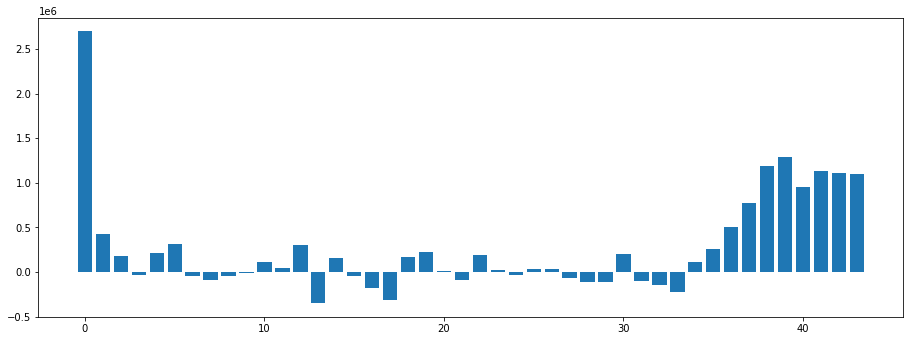

In [84]:
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = LogisticRegression()
# # fit the model
# model.fit(X, y)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.rcParams["figure.figsize"] = [15.50, 5.50]
x = [1.2]
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [80]:
for x in range(len(importance)):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [61]:




list_features1 = []
for i,v in enumerate(importance):
    a = [('Feature %0d: %.5f' % (i,v))]
    list_features1.append(a)

    
    

    

In [72]:
importance

array([2696093.28796624,  422471.22380461,  180625.23064674,
        -32046.25726655,  206725.46769712,  310234.1364333 ,
        -49741.08090426,  -93258.20091521,  -47747.52173133,
         -6562.37396924,  115627.60719694,   39216.62334784,
        306222.86235203, -350730.56817429,  154986.7191244 ,
        -45735.12694562, -182361.02078029, -314571.11492635,
        162328.92162212,  226740.44955229,   15463.74085056,
        -85469.60652396,  188636.8201792 ,   18944.29347893,
        -31360.62428079,   28452.65543789,   33114.99090314,
        -68859.43224842, -114022.36154317, -117937.88499916,
        199288.86314864, -100367.68196839, -148969.69848163,
       -227350.12006777,  109766.50410116,  257161.1031181 ,
        500216.19174318,  776760.32828494, 1182730.22621542,
       1285701.36725895,  950582.95340401, 1129210.142061  ,
       1109486.28008706, 1094023.910918  ])

In [66]:
list_features1

[['Feature 0: 2696093.28797'],
 ['Feature 10: 115627.60720'],
 ['Feature 11: 39216.62335'],
 ['Feature 12: 306222.86235'],
 ['Feature 13: -350730.56817'],
 ['Feature 14: 154986.71912'],
 ['Feature 15: -45735.12695'],
 ['Feature 16: -182361.02078'],
 ['Feature 17: -314571.11493'],
 ['Feature 18: 162328.92162'],
 ['Feature 19: 226740.44955'],
 ['Feature 1: 422471.22380'],
 ['Feature 20: 15463.74085'],
 ['Feature 21: -85469.60652'],
 ['Feature 22: 188636.82018'],
 ['Feature 23: 18944.29348'],
 ['Feature 24: -31360.62428'],
 ['Feature 25: 28452.65544'],
 ['Feature 26: 33114.99090'],
 ['Feature 27: -68859.43225'],
 ['Feature 28: -114022.36154'],
 ['Feature 29: -117937.88500'],
 ['Feature 2: 180625.23065'],
 ['Feature 30: 199288.86315'],
 ['Feature 31: -100367.68197'],
 ['Feature 32: -148969.69848'],
 ['Feature 33: -227350.12007'],
 ['Feature 34: 109766.50410'],
 ['Feature 35: 257161.10312'],
 ['Feature 36: 500216.19174'],
 ['Feature 37: 776760.32828'],
 ['Feature 38: 1182730.22622'],
 ['Fea

In [71]:
for n in list_features1[1]:
    print(n)

Feature 10: 115627.60720


# All the functions in one place

In [60]:
def input_single(my_list):
    #print('my_list',len(my_list))
    a = array_create(my_list)
    #print('a',len(a))
    value = reshaping(a)
    #print('value',len(value))
    list4 = list_convert(value)
    #print('list4',len(list4))
    pred_output(list4)
    

In [61]:
input_single(lst)

reshape_value 44
[4973199.27609883]


C:\Users\Aorus\anaconda3\envs\Gpu_work\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
def pred_output(list4):
    new_output = lr.predict(list4)
    print(new_output)


# Appending a numpy array

In [57]:
def array_create(my_list):
    a = np.array([0])
    for n in my_list:
        a = np.append(a,[n])
    return a 

In [155]:
a

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0])

# Reshaping and Normalizing the values

In [58]:
def reshaping(value):
    print('reshape_value',len(value))
    b = value.reshape(-1,1)
    m = scalar.fit_transform(b)
    return m 

In [88]:
m

array([[-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [-1.06904497],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497],
       [ 0.93541435],
       [-1.06904497]])

# Converting back into list

In [59]:
def list_convert(value):
    list1 = value.tolist()
    list2 = []
    list3 = []
    for n in list1:
        for m in n :
            list2.append(m)
    list3.append(list2)
    return list3

# Creating an pickle file

In [62]:
import pickle

In [64]:
pickle.dump(lr,open('my_model.pkl','wb'))

In [89]:
list1 = []

In [92]:
list1.pop(-1)

[-1.0690449676496976]